In [1]:
pip install matplotlib paddleocr opencv-python

In [7]:
from paddleocr import PaddleOCR, draw_ocr
from matplotlib import pyplot as plt
import cv2 as cv2
import os

In [ ]:
!git clone https://github.com/PaddlePaddle/PaddleOCR

In [24]:
ocr_model = PaddleOCR(lang='de', use_gpu=False)

[2024/03/07 12:27:40] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\Narendra/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\Narendra/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, 

In [9]:
img_path = r"../sample.jpg"

In [10]:
import os
os.getcwd( )

'E:\\Works\\narendra_tasks\\invoice-ocr\\docai\\pyenv'

In [25]:
result = ocr_model.ocr(img_path)

[2024/03/07 12:27:47] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/03/07 12:27:47] ppocr DEBUG: dt_boxes num : 19, elapsed : 0.18151497840881348
[2024/03/07 12:27:51] ppocr DEBUG: rec_res num  : 19, elapsed : 3.956676483154297


In [26]:
relevant_information = ["badge number:", "last name:", "first name:", "date of birth:", "place of birth:", "date of expiry :"]

In [49]:
j = 0
boxes, texts, scores = [], [], []
for i, res in enumerate(result[0]):
    print(i, res)
    if i not in [1, 4, 6, 11, 13, 15]:
        continue
    boxes.append(res[0])
    if j == 3:
        texts.append(relevant_information[j] + " " + res[1][0][:10]) # remove DEUTSCH at the end
    else:
        texts.append(relevant_information[j] + " " + res[1][0])
    scores.append(res[1][1])
    j += 1

0 [[[21.0, 14.0], [287.0, 14.0], [287.0, 28.0], [21.0, 28.0]], ('BUNDESREPUBLIK.DEUTSCHLAND', 0.9753751754760742)]
1 [[[336.0, 17.0], [455.0, 17.0], [455.0, 34.0], [336.0, 34.0]], ('T22000129', 0.9913237690925598)]
2 [[[20.0, 32.0], [134.0, 32.0], [134.0, 46.0], [20.0, 46.0]], ('PERSONALAUSWEIS', 0.9966886639595032)]
3 [[[214.0, 37.0], [290.0, 37.0], [290.0, 47.0], [214.0, 47.0]], ('Name/Surname/Non', 0.9796600341796875)]
4 [[[216.0, 47.0], [313.0, 47.0], [313.0, 62.0], [216.0, 62.0]], ('MUSTERMANN', 0.9975576400756836)]
5 [[[218.0, 68.0], [322.0, 68.0], [322.0, 83.0], [218.0, 83.0]], ('GEB.GABLER', 0.9861963391304016)]
6 [[[215.0, 85.0], [336.0, 85.0], [336.0, 95.0], [215.0, 95.0]], ('Vornamen/Given names/Prenoms', 0.9749272465705872)]
7 [[[215.0, 94.0], [267.0, 92.0], [268.0, 111.0], [216.0, 113.0]], ('ERIKA', 0.9957267642021179)]
8 [[[211.0, 117.0], [311.0, 114.0], [311.0, 136.0], [212.0, 139.0]], ('Sstuastegrate o brh ', 0.5202640295028687)]
9 [[[365.0, 119.0], [419.0, 119.0], [419

In [50]:
print(texts)

['badge number: T22000129', 'last name: MUSTERMANN', 'first name: Vornamen/Given names/Prenoms', 'date of birth: Geburtsort', 'place of birth: Ssltabl/Pate.of exply/', 'date of expiry : 938568']


In [42]:
font_path = os.path.join('PaddleOCR', 'doc', 'fonts', 'latin.ttf')

In [43]:
img = cv2.imread(img_path)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

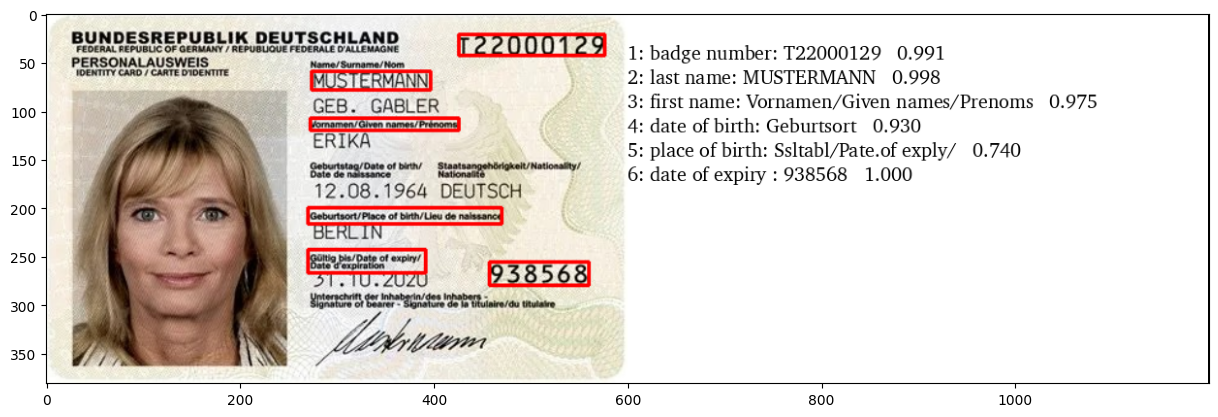

In [44]:
# Visualize our image and detections
# resizing display area
plt.figure(figsize=(15, 15))

# draw annotations on image
annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path)

# show the image using matplotlib
plt.imshow(annotated)
plt.show()